Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


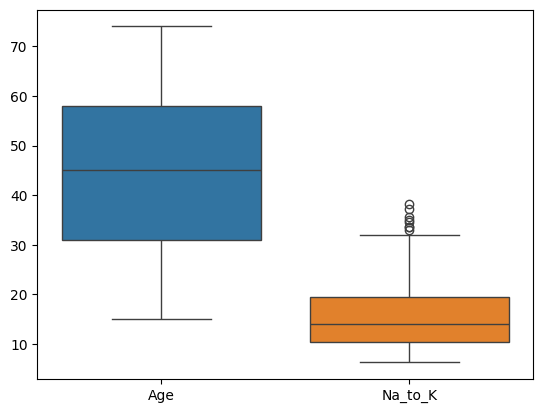

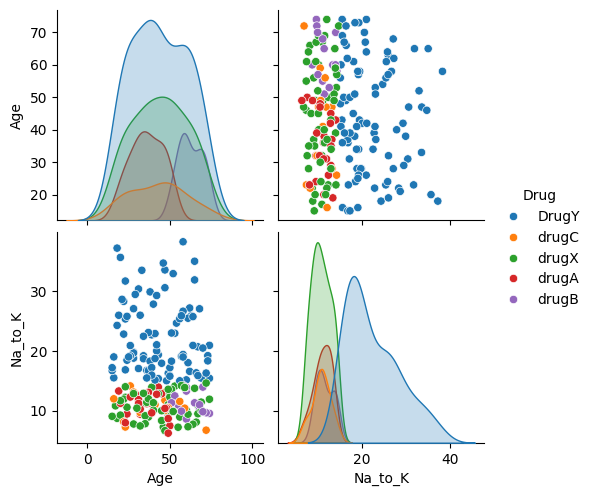

Accuracy: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        15
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11

    accuracy                           0.38        40
   macro avg       0.07      0.20      0.11        40
weighted avg       0.14      0.38      0.20        40



c:\python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#loading dataset
drug = pd.read_csv("drug200.csv")

print(drug.columns)
print(drug.describe())

sns.boxplot(data=drug)
plt.show()

sns.pairplot(data=drug, hue="Drug")
plt.show()

train_data, test_data = train_test_split(drug, test_size=0.2, random_state=42)

#neural network model
label_encoder = LabelEncoder()
for column in ["Sex", "BP", "Cholesterol", "Drug"]:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

#baseline model
def nn_model():
    model = MLPClassifier(hidden_layer_sizes=(1,), activation='identity', max_iter=20, random_state=42)
    return model

# evaluation of model
model = nn_model()
model.fit(train_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']], train_data['Drug'])

#testing of model
predictions = model.predict(test_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']])
accuracy = accuracy_score(test_data['Drug'], predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(test_data['Drug'], predictions))
